In [1]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
digit = X[0]
digit_image = digit.reshape(28, 28)

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import cross_val_predict

lg_clf = LogisticRegression(random_state=42)
lg_clf.fit(X_train, y_train_5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

y_train_pred_lg = cross_val_predict(lg_clf, X_train, y_train_5, cv=3)
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [36]:
from sklearn.metrics import precision_score, recall_score 

p_score_lg = precision_score(y_train_5, y_train_pred_lg)
r_score_lg = recall_score(y_train_5, y_train_pred_lg)

print("Precision Score of Binary Classifer (Logistgic Regression): {}".format(p_score_lg))
print("Recall Score of Binary Classifier (Logistgic Regression): {}".format(r_score_lg))

p_score_sgd = precision_score(y_train_5, y_train_pred_sgd)
r_score_sgd = recall_score(y_train_5, y_train_pred_sgd)

print("Precision Score of Binary Classifer (Stochastic Gradient Descent): {}".format(p_score_sgd))
print("Recall Score of Binary Classifier (Stochastic Gradient Descent): {}".format(r_score_sgd))

Precision Score of Binary Classifer (Logistgic Regression): 0.8903970826580226
Recall Score of Binary Classifier (Logistgic Regression): 0.8107360265633647
Precision Score of Binary Classifer (Stochastic Gradient Descent): 0.8370879772350012
Recall Score of Binary Classifier (Stochastic Gradient Descent): 0.6511713705958311


In [37]:
from sklearn.metrics import precision_recall_curve

y_scores_lg = cross_val_predict(lg_clf, X_train, y_train_5, cv=3, method='decision_function')
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train_5, y_scores_lg)

y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train_5, y_scores_sgd)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


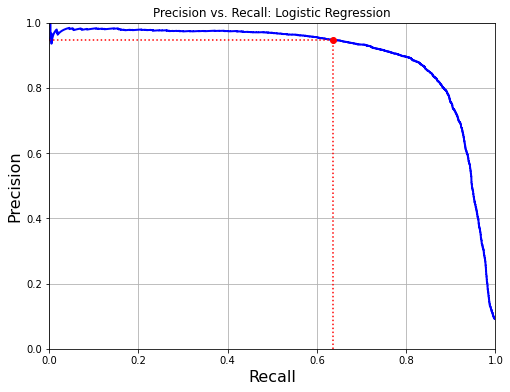

In [38]:
from matplotlib import pyplot as plt

def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, 'b-', linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_lg, recalls_lg)
plt.plot([0.6368, 0.6368], [0., 0.946], "r:")
plt.plot([0.0, 0.6368], [0.946, 0.946], "r:")
plt.plot([0.6368], [0.946], "ro")
plt.title("Precision vs. Recall: Logistic Regression")
plt.show()

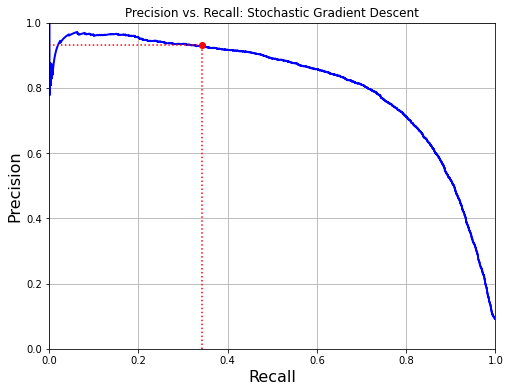

In [39]:
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, 'b-', linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_sgd, recalls_sgd)
plt.plot([0.342, 0.342], [0., 0.93], "r:")
plt.plot([0.0, 0.342], [0.93, 0.93], "r:")
plt.plot([0.342], [0.93], "ro")
plt.title("Precision vs. Recall: Stochastic Gradient Descent")
plt.show()

In [40]:
import numpy as np 

threshold_95_precision_lg = thresholds_lg[np.argmax(precisions_lg >= 0.95)] 
y_train_pred_95_lg = (y_scores_lg >= threshold_95_precision_lg)

ps_95_lg = precision_score(y_train_5, y_train_pred_95_lg)
rs_95_lg = recall_score(y_train_5, y_train_pred_95_lg)

print("Precision score with a 95% threshold (Logistic Regression): {}".format(ps_95_lg))
print("Recall score with a 95% threshold (Logistic Regression): {}".format(rs_95_lg))

Precision score with a 95% threshold (Logistic Regression): 0.95
Recall score with a 95% threshold (Logistic Regression): 0.6203652462645268


In [41]:
threshold_93_precision_sgd = thresholds_sgd[np.argmax(precisions_sgd >= 0.93)] 
y_train_pred_93_sgd = (y_scores_sgd >= threshold_93_precision_sgd)

ps_93_sgd = precision_score(y_train_5, y_train_pred_93_sgd)
rs_93_sgd = recall_score(y_train_5, y_train_pred_93_sgd)

print("Precision score with a 93% threshold (SGD): {}".format(ps_93_sgd))
print("Recall score with a 93% threshold (SGD): {}".format(rs_93_sgd))

Precision score with a 95% threshold (SGD): 0.9300261096605744
Recall score with a 95% threshold (SGD): 0.328537170263789


In [28]:
from sklearn.metrics import roc_curve 

fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_train_5, y_scores_lg)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_5, y_scores_sgd)

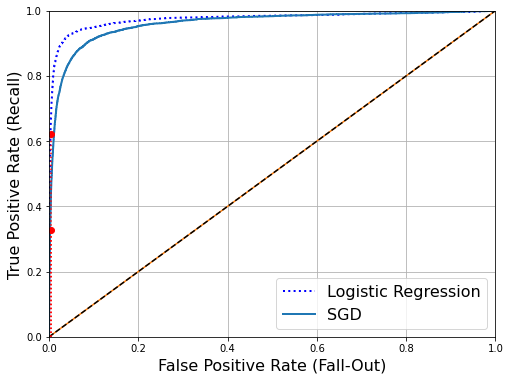

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])                                   
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
  plt.grid(True)                                           

plt.figure(figsize=(8, 6))
plt.plot(fpr_lg, tpr_lg, "b:", linewidth=2, label="Logistic Regression")
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD")
plt.plot([4.837e-3, 4.837e-3], [0., 0.6203], "r:")
plt.plot([0.0, 4.837e-3], [0.6203, 0.6203], "r:")
plt.plot([4.837e-3], [0.6203], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.3285], "r:")
plt.plot([4.837e-3], [0.3285], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()